# Using Azure Face Service to extract Face Landmarks

Install Azure Face Service library

In [1]:
#!pip install azure-cognitiveservices-vision-face

     |████████████████████████████████| 67 kB 4.7 MB/s eta 0:00:011
     |████████████████████████████████| 85 kB 3.8 MB/s  eta 0:00:01
     |████████████████████████████████| 45 kB 2.9 MB/s eta 0:00:01


Import necessary libraries

In [2]:
from azure.cognitiveservices.vision.face import FaceClient
from msrest.authentication import CognitiveServicesCredentials
import os
import requests
from PIL import Image, ImageDraw
from io import BytesIO
import matplotlib.pyplot as plt
from matplotlib import patches

Define the key and endpoint of Azure Face Service

In [3]:
KEY = "PLEASE_ENTER_YOUR_OWN_AZURE_FACE_SERVICE_KEY"
ENDPOINT = "https://PLEASE_ENTER_YOUR_OWN_AZURE_FACE_SERVICE_ENDPOINT_NAME.cognitiveservices.azure.com/"

Define the Face Service client

In [4]:
face_client = FaceClient(ENDPOINT, CognitiveServicesCredentials(KEY))

Post image to Azure Face Service to obtain face landmarks

In [5]:
image_path = os.path.join('./images/rober_downey_jr_1.jpg')
image_data = open(image_path, 'rb')
subscription_key = KEY
face_api_url = "https://southeastasia.api.cognitive.microsoft.com/face/v1.0/detect"
headers = {'Content-Type': 'application/octet-stream',
'Ocp-Apim-Subscription-Key': subscription_key}
params = {
'returnFaceId': 'true',
'returnFaceLandmarks': 'true'
}
response = requests.post(face_api_url, params=params, headers=headers, data=image_data)
response.raise_for_status()
faces = response.json()
print(faces)

[{'faceId': '70dd6525-87cd-47ee-b46c-4022f860cadf', 'faceRectangle': {'top': 93, 'left': 164, 'width': 142, 'height': 142}, 'faceLandmarks': {'pupilLeft': {'x': 201.3, 'y': 138.7}, 'pupilRight': {'x': 264.6, 'y': 128.8}, 'noseTip': {'x': 232.6, 'y': 165.2}, 'mouthLeft': {'x': 211.2, 'y': 202.7}, 'mouthRight': {'x': 269.7, 'y': 194.5}, 'eyebrowLeftOuter': {'x': 177.2, 'y': 131.1}, 'eyebrowLeftInner': {'x': 219.6, 'y': 121.6}, 'eyeLeftOuter': {'x': 190.1, 'y': 140.3}, 'eyeLeftTop': {'x': 200.3, 'y': 134.2}, 'eyeLeftBottom': {'x': 201.0, 'y': 142.1}, 'eyeLeftInner': {'x': 211.8, 'y': 137.6}, 'eyebrowRightInner': {'x': 238.2, 'y': 117.8}, 'eyebrowRightOuter': {'x': 284.9, 'y': 116.3}, 'eyeRightInner': {'x': 252.0, 'y': 131.1}, 'eyeRightTop': {'x': 263.1, 'y': 124.4}, 'eyeRightBottom': {'x': 264.5, 'y': 133.6}, 'eyeRightOuter': {'x': 274.6, 'y': 128.3}, 'noseRootLeft': {'x': 222.2, 'y': 137.0}, 'noseRootRight': {'x': 240.0, 'y': 134.5}, 'noseLeftAlarTop': {'x': 220.7, 'y': 156.7}, 'noseRigh

Plot face landmarks overlay on image

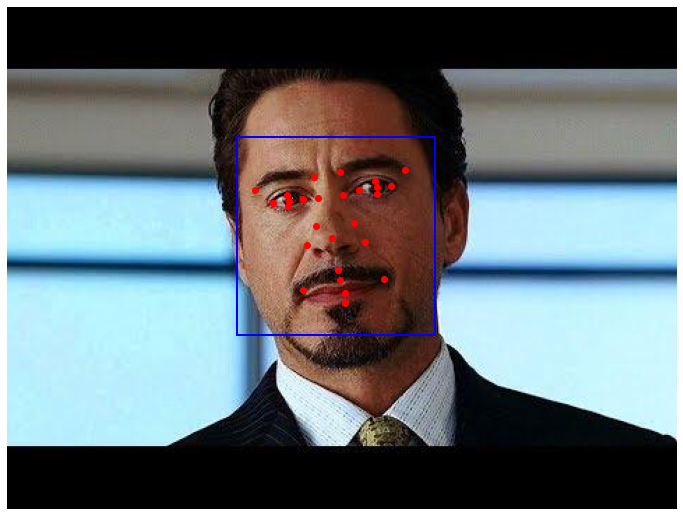

In [7]:
image_orig = open(image_path, 'rb').read()
image = Image.open(BytesIO(image_orig))
plt.figure(figsize=(12, 12))
ax = plt.imshow(image, alpha=1)
for face in faces:
    fr = face['faceRectangle']
    flm = face['faceLandmarks']
    pupilLeft = flm['pupilLeft']
    pupilRight = flm['pupilRight']
    noseTip = flm['noseTip']
    mouthLeft = flm['mouthLeft']
    mouthRight = flm['mouthRight']
    eyebrowLeftOuter = flm['eyebrowLeftOuter']
    eyebrowLeftInner = flm['eyebrowLeftInner']
    eyeLeftInner = flm['eyeLeftInner']
    eyeLeftTop = flm['eyeLeftTop']
    eyeLeftBottom = flm['eyeLeftBottom']
    eyeLeftOuter = flm['eyeLeftOuter']
    eyebrowRightInner = flm['eyebrowRightInner']
    eyebrowRightOuter = flm['eyebrowRightOuter']
    eyeRightInner = flm['eyeRightInner']
    eyeRightTop = flm['eyeRightTop']
    eyeRightBottom = flm['eyeRightBottom']
    eyeRightOuter = flm['eyeRightOuter']
    noseRootLeft = flm['noseRootLeft']
    noseRootRight = flm['noseRootRight']
    noseLeftAlarTop = flm['noseLeftAlarTop']
    noseRightAlarTop = flm['noseRightAlarTop']
    noseLeftAlarOutTip = flm['noseLeftAlarOutTip']
    noseRightAlarOutTip = flm['noseRightAlarOutTip']
    upperLipTop = flm['upperLipTop']
    upperLipBottom = flm['upperLipBottom']
    underLipTop = flm['underLipTop']
    underLipBottom = flm['underLipBottom']
    
    origin = (fr['left'], fr['top'])
    p = patches.Rectangle(
    origin, fr['width'], fr['height'], fill=False, linewidth=2, color='b')
    ax.axes.add_patch(p)
    _ = plt.axis('off')
    plt.scatter(pupilLeft['x'],pupilLeft['y'],color='red')
    plt.scatter(pupilRight['x'],pupilRight['y'],color='red')
    plt.scatter(noseTip['x'],noseTip['y'],color='red')
    plt.scatter(mouthLeft['x'],mouthLeft['y'],color='red')
    plt.scatter(mouthRight['x'],mouthRight['y'],color='red')
    plt.scatter(eyebrowLeftInner['x'],eyebrowLeftInner['y'],color='red')
    plt.scatter(eyebrowLeftOuter['x'],eyebrowLeftOuter['y'],color='red')
    plt.scatter(eyeLeftInner['x'],eyeLeftInner['y'],color='red')
    plt.scatter(eyeLeftTop['x'],eyeLeftTop['y'],color='red')
    plt.scatter(eyeLeftBottom['x'],eyeLeftBottom['y'],color='red')
    plt.scatter(eyeLeftOuter['x'],eyeLeftOuter['y'],color='red')
    plt.scatter(eyebrowRightInner['x'],eyebrowRightInner['y'],color='red')
    plt.scatter(eyebrowRightOuter['x'],eyebrowRightOuter['y'],color='red')
    plt.scatter(eyeRightInner['x'],eyeRightInner['y'],color='red')
    plt.scatter(eyeRightTop['x'],eyeRightTop['y'],color='red')
    plt.scatter(eyeRightBottom['x'],eyeRightBottom['y'],color='red')
    plt.scatter(eyeRightOuter['x'],eyeRightOuter['y'],color='red')
    plt.scatter(noseRootLeft['x'],noseRootLeft['y'],color='red')
    plt.scatter(noseRootRight['x'],noseRootRight['y'],color='red')
    plt.scatter(noseLeftAlarTop['x'],noseLeftAlarTop['y'],color='red')
    plt.scatter(noseRightAlarTop['x'],noseRightAlarTop['y'],color='red')
    plt.scatter(noseLeftAlarOutTip['x'],noseLeftAlarOutTip['y'],color='red')
    plt.scatter(noseRightAlarOutTip['x'],noseRightAlarOutTip['y'],color='red')
    plt.scatter(upperLipTop['x'],upperLipTop['y'],color='red')
    plt.scatter(upperLipBottom['x'],upperLipBottom['y'],color='red')
    plt.scatter(underLipTop['x'],underLipTop['y'],color='red')
    plt.scatter(underLipBottom['x'],underLipBottom['y'],color='red')

plt.show()